<a href="https://colab.research.google.com/github/cysorianoc/IBM_Data_Science/blob/main/Course_8_Module_4_dash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dash Basics: HTML and Core Components

In this lab you will create a basic dashboard with dash using HTML and core components.
\

Dash is a Python framework for building interactive web applications. It allows you to create data visualization apps and dashboards using Python, without needing to know HTML, CSS, or JavaScript. Dash combines the power of Flask, Plotly.js, and React.js to provide a simple yet powerful way to create web-based data applications.

## Key Features of Dash

- Core Components: Includes sliders, dropdowns, and other interactive UI elements.

- HTML Components: Provides native HTML components (e.g., Div, H1, P) for structuring layouts.

- Integration: Seamlessly integrates with Python libraries like pandas, Plotly, and NumPy.

- Interactivity: Enables callbacks for real-time updates of graphs and components

## Example code overview
### Install Required Libraries

The jupyter-dash library is used to run Dash apps within Jupyter notebooks. For external deployment, the pyngrok library is also installed to provide a public-facing URL.

In [1]:
pip install jupyter-dash -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 4.3 MB/s eta 0:00:00


### Import Libraries

- pandas: Handles data manipulation.

- plotly.express: Creates a pie chart for visualization.

- dash: Builds the web application.

- dash.dcc (Dash Core Components): Adds graphs and interactive components.

- dash.html (Dash HTML Components): Structures the app layout with HTML elements.

### Load and Sample Data

``` python
airline_data = pd.read_csv(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv',
    encoding="ISO-8859-1",
    dtype={'Div1Airport': str, 'Div1TailNum': str, 'Div2Airport': str, 'Div2TailNum': str}
)
data = airline_data.sample(n=500, random_state=42)
```
The dataset contains airline performance data. A random sample of 500 entries is extracted for visualization.

### Create a pie chart
So here we use the basics of plotly charts, in this case a standard piechart from our dataset.

```python
fig = px.pie(data, values='Flights', names='DistanceGroup', title='Distance group proportion by flights')
```

### Define the dash app layout

```python
app = dash.Dash(__name__)
app.layout = html.Div(children=[
    html.H1('Airline Dashboard', style={'textAlign': 'center', 'color': '#503D36', 'font-size': 40}),
    html.P('Proportion of distance group (250 mile distance interval group) by flights.',
           style={'textAlign':'center', 'color': '#F57241'}),
    dcc.Graph(figure=fig),
])
```
The app layout is structured as follows:

- Title (H1): A centered heading styled with a custom font size and color.

- Description (P): Explains the purpose of the pie chart.

- Graph Component (dcc.Graph): Displays the pie chart created earlier.

In [47]:
# CODE
# Import required packages
import pandas as pd
import plotly.express as px
import dash
from dash import dcc
from dash import html

# Read the airline data into pandas dataframe
airline_data =  pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv',
                            encoding = "ISO-8859-1",
                            dtype={'Div1Airport': str, 'Div1TailNum': str,
                                   'Div2Airport': str, 'Div2TailNum': str})

# Randomly sample 500 data points. Setting the random state to be 42 so that we get same result.
data = airline_data.sample(n=500, random_state=42)

# Pie Chart Creation using Plotly Express
fig = px.pie(data, values='Flights', names='DistanceGroup', title='Distance group proportion by flights')


# Create a dash application
app = dash.Dash(__name__)

# Get the layout of the application and adjust it.
# Create an outer division using html.Div and add title to the dashboard using html.H1 component
# Add description about the graph using HTML P (paragraph) component
# Finally, add graph component.
app.layout = html.Div(children=[html.H1('Airline Dashboard',style={'textAlign': 'center', 'color': '#503D36', 'font-size': 40}),
                                html.P('Proportion of distance group (250 mile distance interval group) by flights.', style={'textAlign':'center', 'color': '#F57241'}),
                                dcc.Graph(figure=fig),

                    ])





### Run the Dash server
```python
app.run_server(mode='external', port=8050)
```
The app is run on port 8050. The mode='external' ensures that the app is accessible outside the notebook.

In [48]:
# Run the aplication
app.run_server(mode='external', port=8050)

<IPython.core.display.Javascript object>

# Using ngrok for public access

This code uses ngrok to create a public URL for your locally hosted Dash app, making it accessible from anywhere.

In [37]:
! pip install pyngrok

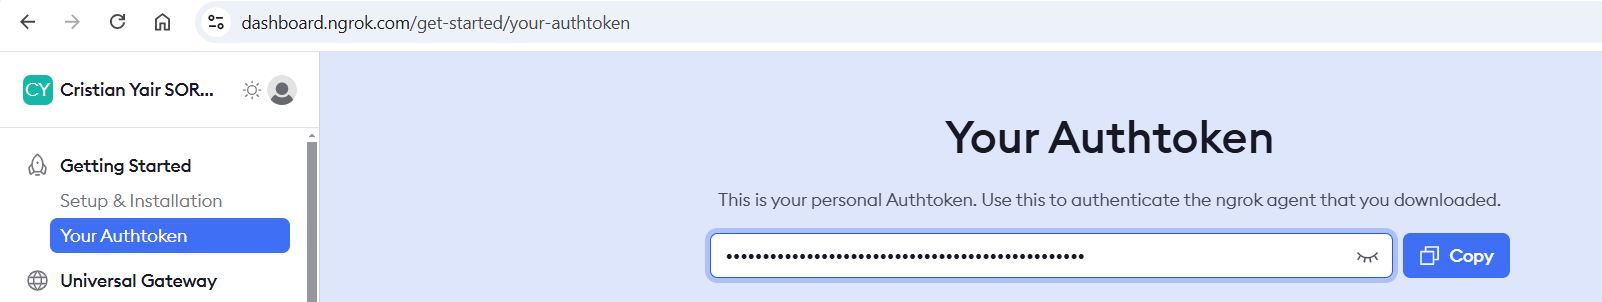

In [38]:
! ngrok authtoken xxxxxxx # paste your ngrok key

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [49]:
from pyngrok import ngrok

# Open an HTTP tunnel for Dash app running on port 8050
public_url = ngrok.connect(8050, bind_tls=True)
print(f"Public URL: {public_url}")


Public URL: NgrokTunnel: "https://73cd-34-82-223-6.ngrok-free.app" -> "http://localhost:8050"


In [50]:
public_url

<NgrokTunnel: "https://73cd-34-82-223-6.ngrok-free.app" -> "http://localhost:8050">

In [42]:
# If any problem ccurs retrieving the URL kill ngrok and run the previous line
# ngrok.kill()

## Adapting the Code for Other Applications

This code serves as a template for building Dash applications. You can easily adapt it for other datasets and visualizations:

- Replace the Dataset: Modify the pd.read_csv line to load your data.

- Customize the Visualization: Change px.pie to other Plotly charts like px.bar, px.line, or px.scatter depending on your requirements.

### Add Interactivity:

- Use Dash callbacks to make the app interactive.

- Example: Add dropdowns or sliders for user input.

- Modify the Layout: Add or remove components like additional graphs, images, or descriptive text.



# Example 2: a scatter plot using random data


In [52]:
import numpy as np
age_array=np.random.randint(25,55,60)
# Define an array containing salesamount values
income_array=np.random.randint(300000,700000,60)

In [54]:
fig2 = px.scatter(x=age_array, y=income_array)
fig2.show()

In [55]:
# CODE
# Import required packages
import pandas as pd
import plotly.express as px
import dash
from dash import dcc
from dash import html
import numpy as np

# Part 1: create some random data for the example
age_array=np.random.randint(25,55,60)
# Define an array containing salesamount values
income_array=np.random.randint(300000,700000,60)

# Randomly sample 500 data points. Setting the random state to be 42 so that we get same result.
data = airline_data.sample(n=500, random_state=42)



# Part 2: Create a plotly express scatter plot
fig2 = px.scatter(x=age_array, y=income_array)


# Part 3: Create a dash application
app2 = dash.Dash(__name__)

# Get the layout of the application and adjust it.
# Create an outer division using html.Div and add title to the dashboard using html.H1 component
# Add description about the graph using HTML P (paragraph) component
# Finally, add graph component.
app2.layout = html.Div(children=[html.H1('Income Dashboard',style={'textAlign': 'center', 'color': '#503D36', 'font-size': 40}),
                                html.P('Generation of a scatter chart using random data', style={'textAlign':'center', 'color': '#F57241'}),
                                dcc.Graph(figure=fig2),

                    ])

In [56]:
# Part 4: Run the aplication
app2.run_server(mode='external', port=8050)

<IPython.core.display.Javascript object>

In [57]:
from pyngrok import ngrok

# Part 5: Open an HTTP tunnel for Dash app running on port 8050
public_url = ngrok.connect(8050, bind_tls=True)
print(f"Public URL: {public_url}")

Public URL: NgrokTunnel: "https://dc92-34-82-223-6.ngrok-free.app" -> "http://localhost:8050"


# Example 3: using a dataframe from a csv file

In [94]:
# Lets retrieve the data from a sample csv file that contains measuremnets of force versus depth for a t-bar test
data=pd.read_csv('/content/SW_01_TBAR1_MO.csv')

In [88]:
#check the dataframe
data.head()

,time,F_Tbar,z_Tbar
0,0.00,59.506996,-4.739809
1,0.01,59.515770,-4.732262
2,0.02,59.549400,-4.736799
3,0.03,59.530392,-4.747356
4,0.04,59.512844,-4.750367


In [95]:
# Apply an offset to the z_Tbar column to start from zero depth

data["z_Tbar"] = data["z_Tbar"]+26
data['F_Tbar']=data['F_Tbar']-59.5

In [104]:
# let's see a sample plotly scatterfigure
fig3=px.scatter(data,x='F_Tbar',y='z_Tbar')
fig3.show()

In [105]:
# Filter data: depth between 0 and -250, and force > 0 to show only the posotive values
filtered_data = data[(data['z_Tbar'] >= -260) & (data['z_Tbar'] <= 0) & (data['F_Tbar'] > 0)]

# Create ta scatter plot
fig3 = px.scatter(filtered_data, x='F_Tbar', y='z_Tbar', title="Filtered Plot")
fig3.update_layout(xaxis_title="Force (F_Tbar)[N]", yaxis_title="Depth (z_Tbar)[mm]")
fig3.show()

In [106]:
# CODE
# Import required packages
import pandas as pd
import plotly.express as px
import dash
from dash import dcc
from dash import html
import numpy as np

# Part 1 obtained from the previous processing

# Part 2: Create a plotly express scatter plot so bring back the figure
fig3 = px.scatter(filtered_data, x='F_Tbar', y='z_Tbar', title="Filtered Plot")
fig3.update_layout(xaxis_title="Force (F_Tbar)[N]", yaxis_title="Depth (z_Tbar)[mm]")


# Part 3: Create a dash application
app3 = dash.Dash(__name__)

# Get the layout of the application and adjust it.
# Create an outer division using html.Div and add title to the dashboard using html.H1 component
# Add description about the graph using HTML P (paragraph) component
# Finally, add graph component.
app3.layout = html.Div(children=[html.H1('T-bar test Dashboard',style={'textAlign': 'center', 'color': '#503D36', 'font-size': 40}),
                                html.P('Generation of a scatter chart using a dataframe', style={'textAlign':'center', 'color': '#F57241'}),
                                dcc.Graph(figure=fig3),

                    ])

In [108]:
# Part 4: Run the aplication
app3.run_server(mode='external', port=8050)

<IPython.core.display.Javascript object>

In [110]:
ngrok.kill()

In [111]:
from pyngrok import ngrok

# Part 5: Open an HTTP tunnel for Dash app running on port 8050
public_url = ngrok.connect(8050, bind_tls=True)
print(f"Public URL: {public_url}")

Public URL: NgrokTunnel: "https://628f-34-82-223-6.ngrok-free.app" -> "http://localhost:8050"


In [ ]:
# draft code ignore it

#from google.colab.output import eval_js

# Start the Dash app
#app.run_server(mode='external', port=8050)

# Retrieve the URL
#url = eval_js("google.colab.kernel.proxyPort(8050, {'cache': false})")
#print(f"Your app is running at: {url}")